## PeopleCount.ipynb  
This notebook explores how population is distributed across continents and regions. By ranking countries by size, growth intensity, and density, it reveals global imbalances and highlights emerging demographic hotspots.  
A launchpad for comparative insights, policy reflection, and spatial forecasting.

<img src="https://worldinmaps.com/wp-content/uploads/world-population-density-map-scaled.jpeg" alt="Population density, 2025" width="600"/>

*Visual: [Population density, 2025](https://ourworldindata.org/grapher/population-density) — a global map showing where people are most concentrated.*

---

## Introduction

Where we live, how many of us there are, and how quickly our numbers are changing — population is more than a metric. It’s a lens into how humanity shapes geography, governance, and opportunity. Some regions grow rapidly, fueled by youth and migration. Others slow down, facing aging populations and urban saturation.

In this notebook, we examine how population is distributed across continents and regions. Using structured World Bank data, we rank countries by size, growth intensity, and density — painting a comparative map of demographic divergence. Through data-driven visuals and regional breakdowns, we aim to capture the dynamics behind where people settle, and why those patterns matter.

This is more than regional analysis. It’s a snapshot of global imbalance, evolving ecosystems, and the silent forces influencing tomorrow’s world.

---

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
pop_df = pd.read_csv("API_SP.POP.TOTL_DS.csv", skiprows=4)  # Skip metadata header
meta_df = pd.read_csv("Meta_country.csv")


pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [2]:
meta_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [7]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [8]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   215 non-null    object 
 3   SpecialNotes  129 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [10]:
pop_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2021                1
2022                1
2023                1
2024                1
Unnamed: 69       266
Length: 70, dtype: int64

In [11]:
meta_df.isnull().sum()

Country Code      0
Region           48
IncomeGroup      50
SpecialNotes    136
TableName         0
Unnamed: 5      265
dtype: int64

### Data Preparation & Merging

To begin our analysis, we clean extraneous columns from both datasets and merge the population data with country-level metadata. This fusion allows us to incorporate region and development indicators for deeper insight into population trends.


In [12]:
# Clean and merge datasets
pop_df = pop_df.drop(columns=['Unnamed: 69'])
meta_df = meta_df.drop(columns=['Unnamed: 5'])

# Merge population data with metadata
merged_df = pd.merge(pop_df, meta_df, on='Country Code', how='left')

# Focus on recent population figures (e.g., 2024)
merged_df['2024'] = merged_df['2024'].fillna(0)
merged_df_clean = merged_df.dropna(subset=['Region', 'IncomeGroup'])

merged_df_clean.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,2023,2024,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,Latin America & Caribbean,High income,NaN,Aruba
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,"Middle East, North Africa, Afghanistan & Pakistan",Low income,The reporting period for national accounts dat...,Afghanistan
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0,2714617.0,Europe & Central Asia,Upper middle income,NaN,Albania
6,Andorra,AND,"Population, total",SP.POP.TOTL,9510.0,10283.0,11086.0,11915.0,12764.0,13634.0,...,76474.0,77380.0,78364.0,79705.0,80856.0,81938.0,Europe & Central Asia,High income,NaN,Andorra


*Merged dataset ready for analysis, with regions and income groups aligned to 2024 population figures.*


### Regional and Development Group Breakdown

We visualize how population is distributed across different regions and income classifications. This highlights disparities in demographic weight and the socioeconomic context of densely populated areas.


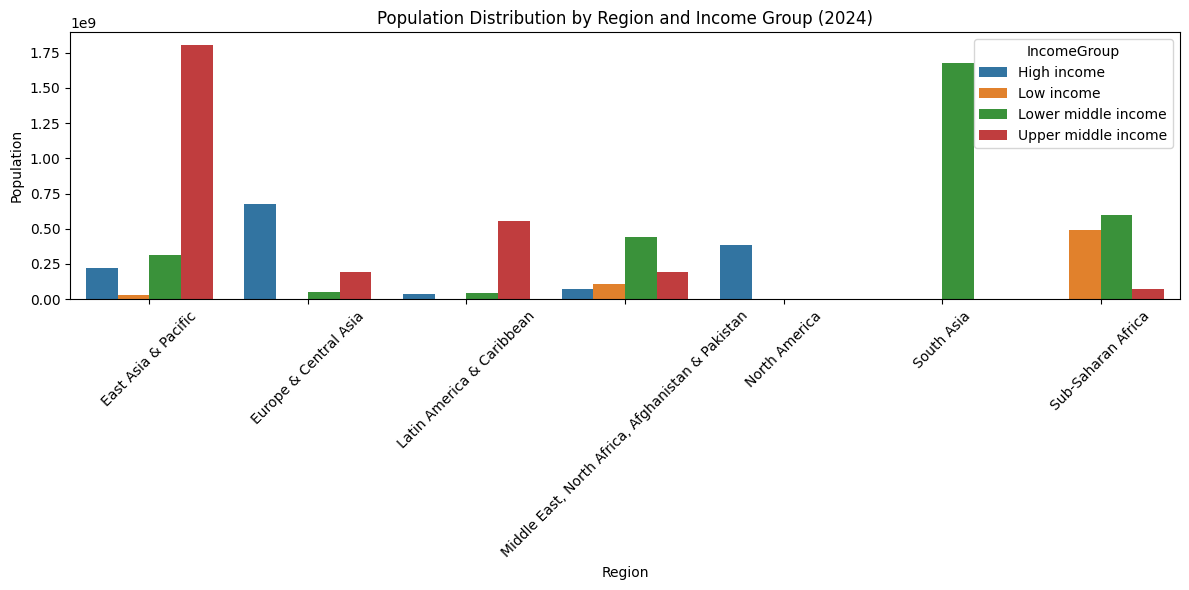

In [13]:
region_group = merged_df_clean.groupby(['Region', 'IncomeGroup'])['2024'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_group, x='Region', y='2024', hue='IncomeGroup')
plt.xticks(rotation=45)
plt.title('Population Distribution by Region and Income Group (2024)')
plt.ylabel('Population')
plt.tight_layout()
plt.show()


 *Clear contrasts emerge between high-income and lower-income regions, shaping the global population map.*


### Population Ranking by Region

Here we rank global regions by their total population. This offers a quick glance at continental and subcontinental dominance in demographic share.


C:\Users\A\AppData\Local\Temp\ipykernel_5500\2925105728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['GrowthRate'] = (merged_df_clean['2024'] - merged_df_clean['2010']) / 14
C:\Users\A\AppData\Local\Temp\ipykernel_5500\2925105728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_by_region.index, y=growth_by_region.values, palette='magma')


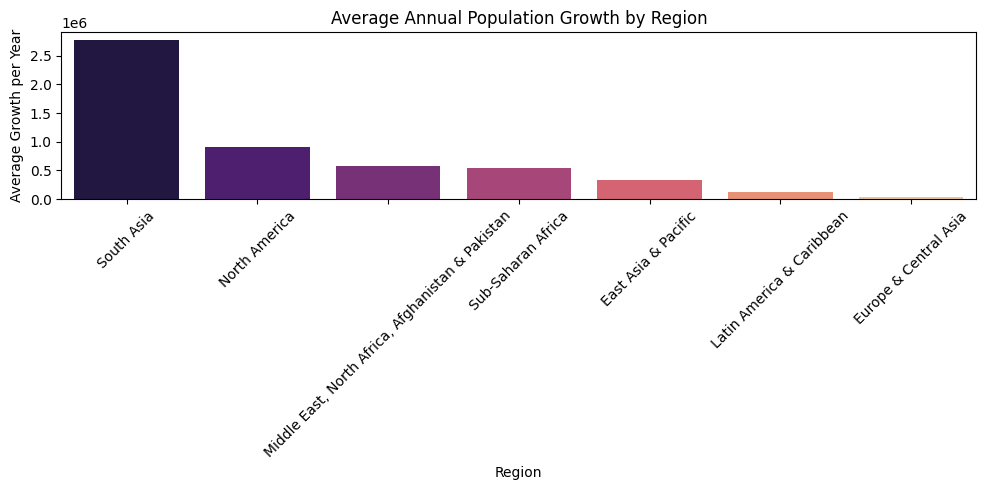

In [14]:
# Calculate average annual growth from 2010 to 2024
merged_df_clean['GrowthRate'] = (merged_df_clean['2024'] - merged_df_clean['2010']) / 14

growth_by_region = merged_df_clean.groupby('Region')['GrowthRate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=growth_by_region.index, y=growth_by_region.values, palette='magma')
plt.title('Average Annual Population Growth by Region')
plt.ylabel('Average Growth per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*Top-ranked regions provide insight into areas with strategic planning needs and policy focus.*


### Top vs Bottom Regions by Growth

By isolating the five fastest and slowest-growing regions, we expose demographic extremes. These outliers can guide attention to regions at both ends of population dynamics.

C:\Users\A\AppData\Local\Temp\ipykernel_5500\2614507618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_growth.index, y=top_growth.values, ax=axes[0], palette='crest')
C:\Users\A\AppData\Local\Temp\ipykernel_5500\2614507618.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_growth.index, y=bottom_growth.values, ax=axes[1], palette='flare')


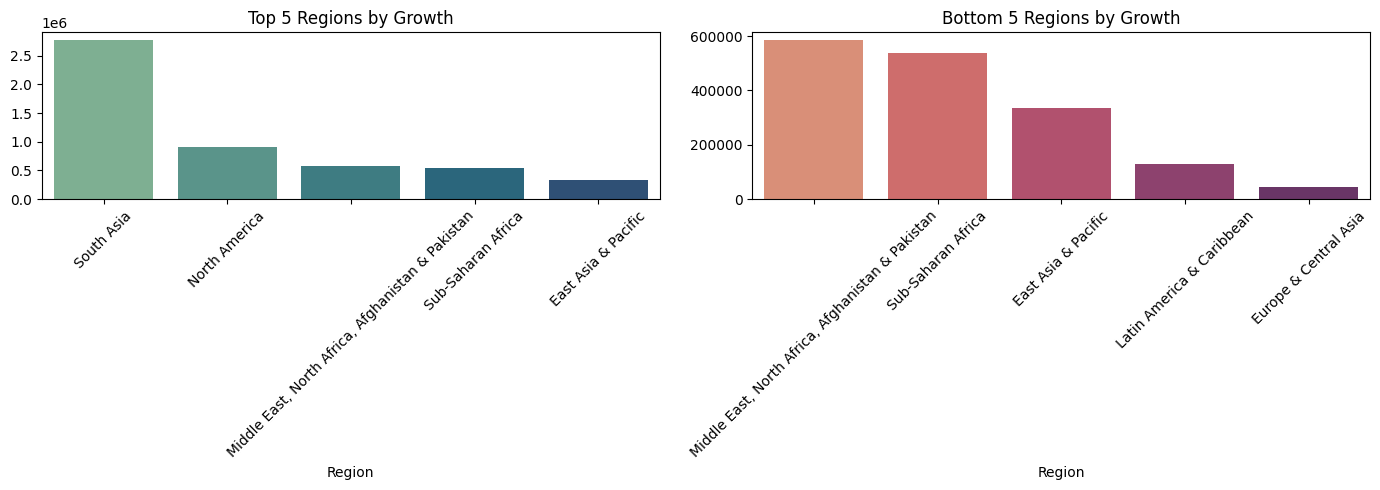

In [15]:
# Top 5 growth regions
top_growth = growth_by_region.head(5)
bottom_growth = growth_by_region.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=top_growth.index, y=top_growth.values, ax=axes[0], palette='crest')
axes[0].set_title('Top 5 Regions by Growth')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=bottom_growth.index, y=bottom_growth.values, ax=axes[1], palette='flare')
axes[1].set_title('Bottom 5 Regions by Growth')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


*While some regions surge ahead, others face stagnation—highlighting uneven demographic transitions.*


### Socio-Economic Narrative with Metadata

Using "IncomeGroup" metadata, we examine population through a socio-economic lens. This frames demographic data within development contexts and helps identify where policy and investment may be needed most.


C:\Users\A\AppData\Local\Temp\ipykernel_5500\1159576015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_pop.index, y=income_pop.values, palette='coolwarm')


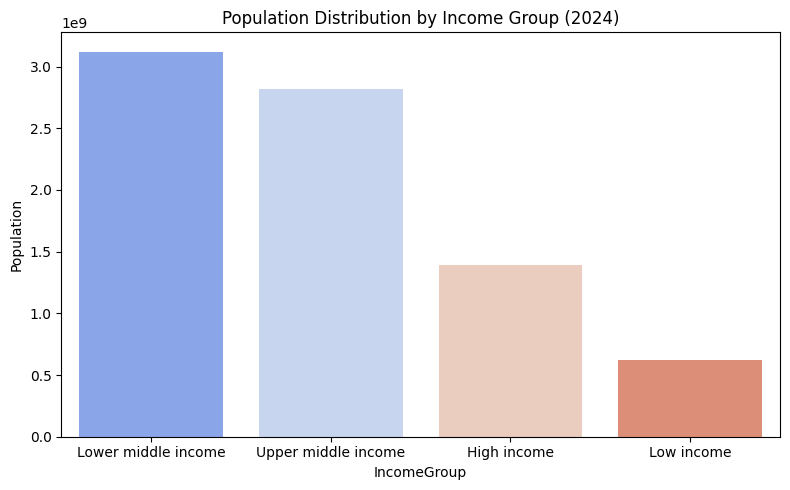

In [16]:
income_pop = merged_df_clean.groupby(['IncomeGroup'])['2024'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=income_pop.index, y=income_pop.values, palette='coolwarm')
plt.title('Population Distribution by Income Group (2024)')
plt.ylabel('Population')
plt.tight_layout()
plt.show()


*Population concentration correlates with income level, offering a backdrop for global equity discussions.*


## Final Remarks

This project presents a comprehensive view of global population patterns using time-series data enriched with regional and economic metadata.  
Through careful segmentation and growth analysis, the notebook showcases how geographic context and income groups contribute to population dynamics and development gaps.

From visual comparisons to ranked growth insights, this exploration serves as a powerful reference for:
- Regional planning and policy design  
- Forecasting demographic hotspots  
- Supporting equitable global development  

*Key Tools Used:* Pandas, Seaborn, Matplotlib  
*Core Concepts:* Data Merging, Aggregation, Ranking, Growth Metrics, Socio-economic Categorization  


## Project Objective

The objective of **PeopleCount.ipynb** is to analyze global population distribution through a multi-dimensional lens—geography, economic status, and temporal change.  
By merging country-level metadata with population figures, the project visualizes emerging trends, highlights regional imbalances, and lays the groundwork for data-driven forecasting and policy discourse.


## Author

**Nitish M.**  
Developer focused on wellness-centric tools and visual storytelling.  
This notebook was built using World Bank population data and country metadata to explore global demographic patterns through code and visualization.